In [1]:
# Ensemble Methods**: 
# Experiment with ensemble methods like bagging, boosting, 
# and stacking to combine the predictions of multiple models for improved performance.


In [2]:
import joblib
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [3]:
def load_data(file_path):
    file_path = r"C:\Users\User\Desktop\tf"
    pass


# Function to replace single backslashes with an empty string
def replace_single_backslashes(data):
    return [[item.replace('\\', '') for item in row] for row in data]

# Load and preprocess data
def load_data(file_path):
    with open(file_path, "r") as file:
        lines = file.readlines()
        

    data = [line.strip().split('\t') for line in lines]

    # Replace single backslashes with an empty string in the data before creating the DataFrame
    data = replace_single_backslashes(data)

    # Assuming the first line contains column headers
    columns = data[0]
    rows = data[1:]

    df = pd.DataFrame(rows, columns=columns)

    return df

# Usage
df_whale = load_data(r"C:\Users\User\Desktop\tf\Label Whale.txt")
df_non_whale = load_data(r"C:\Users\User\Desktop\tf\Label NON-Whale.txt")

print("Columns in df_whale:", df_whale.columns)
print("Columns in df_non_whale:", df_non_whale.columns)

Columns in df_whale: Index(['0.000000', '0.130985', 'bl1'], dtype='object')
Columns in df_non_whale: Index(['2.986469', '3.877170', 'no1'], dtype='object')


In [4]:
# Add label column to dataframes
df_whale['label'] = 'Whale'
df_non_whale['label'] = 'non Whale'

df_combined = pd.concat([df_whale, df_non_whale], ignore_index=True)

X = df_combined.drop("label", axis=1)
y = df_combined["label"]

# Convert labels using label encoding
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Convert X to numeric values (if needed)
X_numeric = X.apply(pd.to_numeric, errors='coerce')
X_numeric = X_numeric.fillna(0)  # Replace NaN values with 0

X_train, X_temp, y_train_encoded, y_temp_encoded = train_test_split(X_numeric, y_encoded, test_size=0.3, random_state=42)
X_val, X_test, y_val_encoded, y_test_encoded = train_test_split(X_temp, y_temp_encoded, test_size=0.5, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [5]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create base classifiers (you can choose different types)
base_classifier_1 = DecisionTreeClassifier(random_state=42)
base_classifier_2 = SVC(kernel='linear', C=1.0, random_state=42)

# Create bagging ensemble
bagging_classifier = BaggingClassifier(base_classifier_1, n_estimators=10, random_state=42)

# Create boosting ensemble with algorithm='SAMME'
boosting_classifier = AdaBoostClassifier(base_classifier_2, n_estimators=50, random_state=42, algorithm='SAMME')

# Create stacking ensemble
stacking_classifier = StackingClassifier(
    estimators=[('bagging', bagging_classifier), ('boosting', boosting_classifier)],
    final_estimator=DecisionTreeClassifier(),  # Final estimator to make the final prediction
    cv=5  # Number of cross-validation folds
)

# Train the bagging classifier
bagging_classifier.fit(X_train_scaled, y_train_encoded)

# Train the boosting classifier
boosting_classifier.fit(X_train_scaled, y_train_encoded)

# Train the stacking classifier
stacking_classifier.fit(X_train_scaled, y_train_encoded)

# Make predictions on the validation set
bagging_preds = bagging_classifier.predict(X_val_scaled)
boosting_preds = boosting_classifier.predict(X_val_scaled)
stacking_preds = stacking_classifier.predict(X_val_scaled)

# Evaluate the performance of each ensemble
bagging_accuracy = accuracy_score(y_val_encoded, bagging_preds)
boosting_accuracy = accuracy_score(y_val_encoded, boosting_preds)
stacking_accuracy = accuracy_score(y_val_encoded, stacking_preds)

print("Bagging Ensemble Accuracy:", bagging_accuracy)
print("Boosting Ensemble Accuracy:", boosting_accuracy)
print("Stacking Ensemble Accuracy:", stacking_accuracy)


Bagging Ensemble Accuracy: 1.0
Boosting Ensemble Accuracy: 0.9663865546218487
Stacking Ensemble Accuracy: 1.0


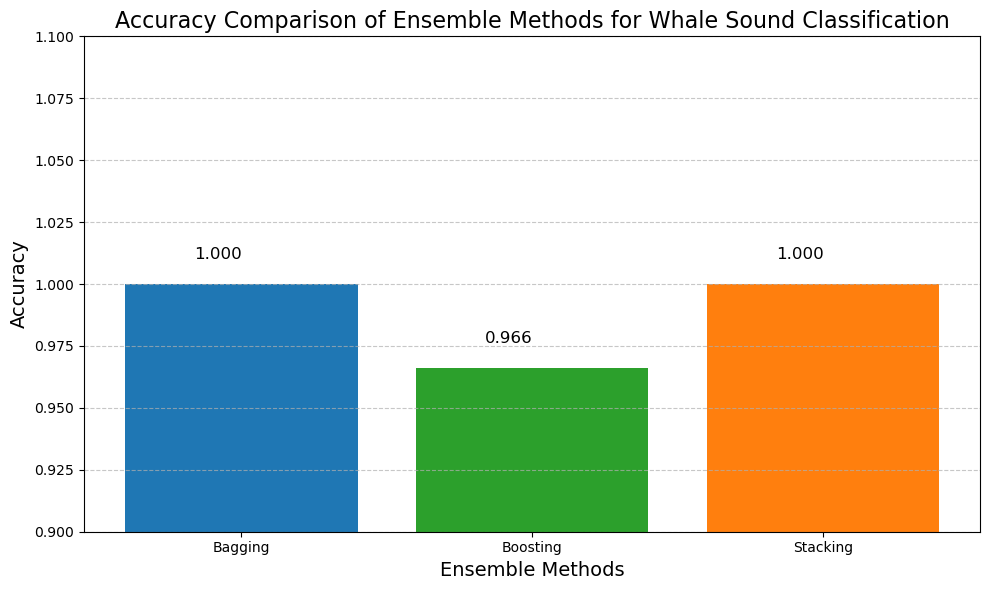

In [6]:
import matplotlib.pyplot as plt

# Accuracy scores for different ensemble methods
ensemble_methods = ["Bagging", "Boosting", "Stacking"]
accuracy_scores = [1.0, 0.966, 1.0]

# Define custom colors for each method
colors = ['#1f77b4', '#2ca02c', '#ff7f0e']

# Create a bar plot to visualize accuracy
plt.figure(figsize=(10, 6))
bars = plt.bar(ensemble_methods, accuracy_scores, color=colors)

# Add accuracy values as text above each bar
for bar, accuracy in zip(bars, accuracy_scores):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.08, accuracy + 0.01, f'{accuracy:.3f}', ha='center', fontsize=12)

plt.xlabel('Ensemble Methods', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Accuracy Comparison of Ensemble Methods for Whale Sound Classification', fontsize=16)
plt.ylim(0.9, 1.1)  # Set the y-axis limits for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


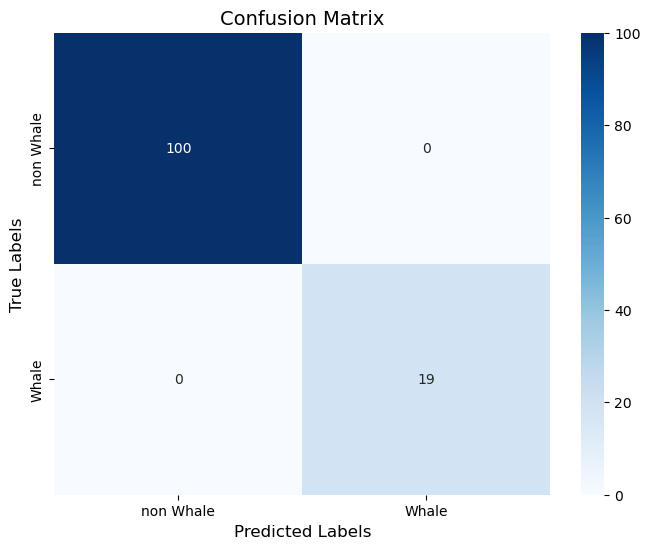

In [7]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Make predictions on the validation set using the stacking ensemble (replace with your model)
y_pred = stacking_classifier.predict(X_val_scaled)

# Calculate the confusion matrix
confusion = confusion_matrix(y_val_encoded, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=["non Whale", "Whale"], yticklabels=["non Whale", "Whale"])
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.title('Confusion Matrix', fontsize=14)
plt.show()
